In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad

In [2]:
import umap
from sklearn.metrics import calinski_harabasz_score


/opt/anaconda3/envs/scvi-env-arm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
adata = ad.read_h5ad("/Users/apple/Desktop/KB/data/BiddyData/biddy_10215_2000.h5ad")
adata.shape

(10215, 2000)

In [4]:
# Extract the data matrix and labels
data = adata.X
labels = adata.obs['clone_id'].values

# Initialize UMAP with a higher number of neighbors for supervised learning
reducer = umap.UMAP(n_neighbors=15, n_components=10)




In [5]:
# Fit and transform the data with the labels
embedding = reducer.fit_transform(data, y=labels)

In [6]:
# Calculate the Calinski-Harabasz score
score = calinski_harabasz_score(embedding, labels)

# Print the score
print("Calinski-Harabasz Score:", score)


Calinski-Harabasz Score: 70.48787342983323


In [7]:
embedding.shape

(10215, 10)

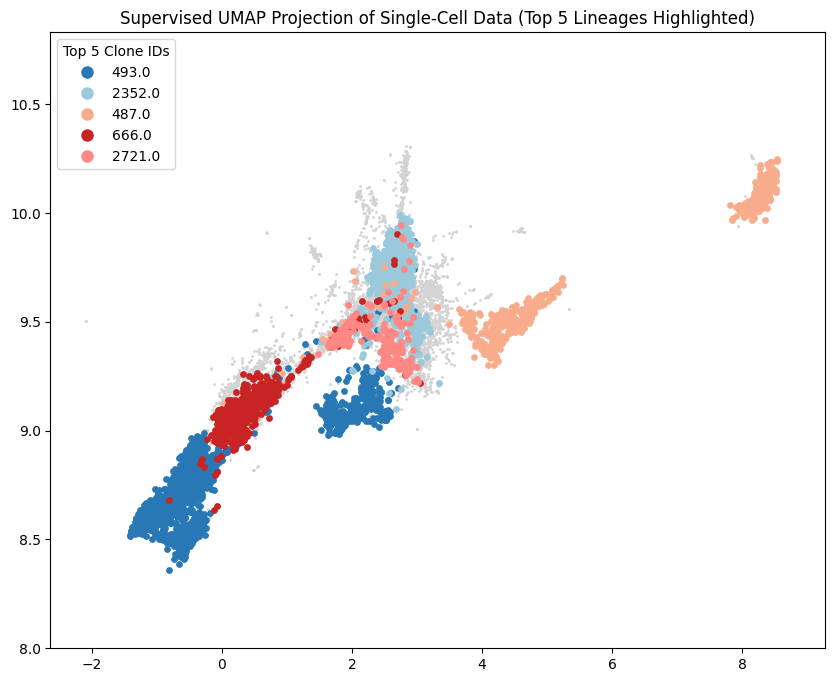

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the value counts of the clone_id
clone_id_counts = adata.obs['clone_id'].value_counts()

# Identify the top 5 most frequent clone_ids
top_5_clone_ids = clone_id_counts.index[:5]

# Create a color map: all points are light gray by default
color_map = {clone_id: 'lightgray' for clone_id in labels}

# Assign colors to the top 5 clone_ids using the provided color codes
custom_palette = ['#2878B5', '#9AC9DB', '#F8AC8C', '#C82423', '#FF8884']
for i, clone_id in enumerate(top_5_clone_ids):
    color_map[clone_id] = custom_palette[i]

# Generate the colors list based on the color_map
colors = [color_map[clone_id] for clone_id in labels]

# Separate indices for gray and colored cells
gray_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] == 'lightgray']
color_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] != 'lightgray']

# Create a scatter plot of the UMAP embedding
plt.figure(figsize=(10, 8))

# Plot gray cells first
plt.scatter(embedding[gray_indices, 0], embedding[gray_indices, 1], c='lightgray', s=1, label='_nolegend_')

# Overlay colored cells
for clone_id in top_5_clone_ids:
    color_mask = np.array([clone_id == cid for cid in labels])
    plt.scatter(embedding[color_mask, 0], embedding[color_mask, 1], 
                c=[color_map[clone_id]], s=15, label=clone_id)

# Set y-axis limits to start from 8
plt.ylim(8.0, plt.ylim()[1])

# Create a custom legend for the top 5 clone IDs
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_palette[i], markersize=10, label=f'{clone_id}')
                  for i, clone_id in enumerate(top_5_clone_ids)]
plt.legend(handles=legend_handles, title="Top 5 Clone IDs")

plt.title('Supervised UMAP Projection of Single-Cell Data (Top 5 Lineages Highlighted)')
plt.show()


In [ ]:
# Get the value counts of the clone_id
clone_id_counts = adata.obs['clone_id'].value_counts()

# Identify the top 5 most frequent clone_ids
top_5_clone_ids = clone_id_counts.index[:5]

# Create a color map: all points are light gray by default
color_map = {clone_id: 'lightgray' for clone_id in labels}

# Assign colors to the top 5 clone_ids
palette = sns.color_palette('hsv', len(top_5_clone_ids))  # Or any other palette you prefer
for i, clone_id in enumerate(top_5_clone_ids):
    color_map[clone_id] = palette[i]

# Generate the colors list based on the color_map
colors = [color_map[clone_id] for clone_id in labels]

# Separate indices for gray and colored cells
gray_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] == 'lightgray']
color_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] != 'lightgray']

# Create a scatter plot of the UMAP embedding
plt.figure(figsize=(10, 8))

# Plot gray cells first
plt.scatter(embedding[gray_indices, 0], embedding[gray_indices, 1], c='lightgray', s=5, label='_nolegend_')

# Overlay colored cells
for clone_id in top_5_clone_ids:
    color_mask = np.array([clone_id == cid for cid in labels])
    plt.scatter(embedding[color_mask, 0], embedding[color_mask, 1], 
                c=[color_map[clone_id]], s=5, label=clone_id)

# Set y-axis limits to start from 8
plt.ylim(8.5, plt.ylim()[1])

# Create a custom legend for the top 5 clone IDs
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=10, label=f'{clone_id}')
                  for i, clone_id in enumerate(top_5_clone_ids)]
plt.legend(handles=legend_handles, title="Top 5 Clone IDs")

plt.title('Supervised UMAP Projection of Single-Cell Data (Top 5 Lineages Highlighted)')
plt.show()